# TRABALHO FINAL - Sistemas Embarcados
## Análises data set 

https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer#

Activity Recognition from Single Chest-Mounted Accelerometer Data Set


In [1]:
!pip install -U -q PyDrive

!pip uninstall scikit-learn -y

!pip install -U scikit-learn

!pip install -U scipy


import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


import numpy as np

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from os.path import exists as file_exists
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.metrics import plot_confusion_matrix


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)


drive.mount('/content/gdrive')

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3 MB 67.3 MB/s 
     |████████████████████████████████| 28.5 MB 34 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Mounted at /content/gdrive


In [2]:
#leitura do arquivo
!ls "/content/gdrive/MyDrive/Colab Notebooks/"
file = '/content/gdrive/MyDrive/Colab Notebooks/files/1.csv'

 CdiasExercicio2.ipynb
'Cópia de Charts in Colaboratory'
'Cópia de PY0101EN-4-1-ReadFile.ipynb'
 estatistica
 estats
 Exercicio2-parte2.ipynb
 Exercicios-2.ipynb
 files
 ia
 IA-LAB1
 IA-LAB1-OutLiers.ipynb
 IA-Lab2.ipynb
 ImagemCloud.ipynb
 Lista1-IA.ipynb
 lista1.ipynb
 lista2.ipynb
 Lista3-2.ipynb
 lista3.ipynb
 Lista5.ipynb
 medidas_estatisticas.ipynb
 p3-random-forest-tuning-randomizedsearchcv.ipynb
 palavras.txt
 parrot.ipynb
'Política e COVID.ipynb'
'Política e COVID_NOVO.ipynb'
 ProjetoEstat.ipynb
 ProjetoFinalTAAED-v1.ipynb
 RandomForest.ipynb
 step-by-step-kmeans-explained-in-detail.ipynb
 -SupervisedLearning.ipynb
 SupervisedLearning.ipynb
 tempoxclasse.ipynb
'Trabalho de I.A.gdoc'
 TrabalhoFinal.ipynb
 TrabalhoFinal_SE2.ipynb
 TrabalhoFinal_SE.ipynb
 trabalhoIA.ipynb
 Untitled


In [3]:
url = file
df = pd.read_csv(url)

df

,indice,x,y,z,movimento
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
111745,130250.0,1903,2385,1995,7
111746,130250.0,1899,2384,1990,7
111747,130260.0,1909,2384,1992,7
111748,130260.0,1902,2388,1989,7


In [4]:
valuesDf = df.drop(columns=['indice', 'movimento'], axis=1)
valuesDf.describe()

,x,y,z
count,111750.000000,111750.000000,111750.000000
mean,1916.816260,2379.689315,2046.234577
std,42.958727,37.594662,62.292015
min,1455.000000,1697.000000,994.000000
25%,1888.000000,2374.000000,1993.000000
50%,1908.000000,2380.000000,2023.000000
75%,1961.000000,2386.000000,2113.000000
max,2356.000000,2713.000000,2739.000000


## Divisão do conjunto de dados
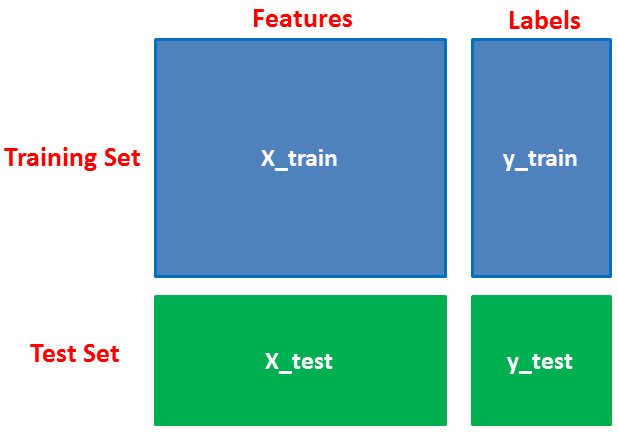


In [5]:

X = df[['x', 'y', 'z']]
y = df['movimento']

print(X.shape)
print(y.shape)



(111750, 3)
(111750,)


In [6]:
from sklearn.model_selection import train_test_split
# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((78225, 3), (33525, 3), (78225,), (33525,))

## Naive Bayes
> Detalhes em: https://scikit-learn.org/stable/modules/naive_bayes.html

In [16]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))


In [7]:
from sklearn.model_selection import train_test_split
# Divisão do conjunto de dados  teste (1/3); treino (2/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66,test_size=0.33, random_state=10)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73755, 3), (36878, 3), (73755,), (36878,))

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Treinar o modelo usando o conjunto de treinamento
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.fit(X_train, y_train).predict(X_test)


print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36878 points : 6995


# Validação Cruzada, Matriz de Confusão e Gráficos
**VALIDAÇÃO CRUZADA**


In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gnb, X, y, cv=5)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation score with 10 folds: [0.66711409 0.82304251 0.83923937 0.84845638 0.81700224]
Mean cross-validation score with 10 folds: 0.799


In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gnb, X, y, cv=7)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation score with 10 folds: [0.63758221 0.81603508 0.82717364 0.83725883 0.85561263 0.83625658
 0.80869456]
Mean cross-validation score with 10 folds: 0.803


In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gnb, X, y, cv=9)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation score with 10 folds: [0.59128614 0.81034066 0.82813884 0.82008537 0.84239349 0.85672868
 0.84552191 0.83835374 0.79663338]
Mean cross-validation score with 10 folds: 0.803


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gnb, X, y, cv=10)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation score with 10 folds: [0.58782998 0.79149888 0.83024609 0.81870246 0.83856823 0.84420582
 0.85959732 0.83847875 0.84178971 0.79069351]
Mean cross-validation score with 10 folds: 0.804


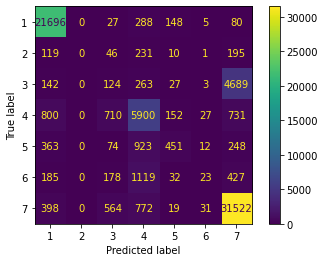

In [13]:
# Predicting the Test set results  
y_pred = gnb.predict(X_test)  


# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

cm

plot_confusion_matrix(gnb, X_train, y_train, values_format='d' )


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
y_pred = gnb.predict(X_test)
print("Relatório de classificação: \n", classification_report(y_test, y_pred, zero_division=1))  

Relatório de classificação: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94     11102
           2       1.00      0.00      0.00       317
           3       0.07      0.02      0.04      2568
           4       0.62      0.71      0.67      4190
           5       0.55      0.23      0.32      1093
           6       0.14      0.01      0.02       927
           7       0.84      0.94      0.89     16681

    accuracy                           0.81     36878
   macro avg       0.59      0.41      0.41     36878
weighted avg       0.76      0.81      0.77     36878



In [18]:
evaluate_model(gnb)

Train Accuracy : 0.8096535828079452
Train Confusion Matrix:
[[21696     0    27   288   148     5    80]
 [  119     0    46   231    10     1   195]
 [  142     0   124   263    27     3  4689]
 [  800     0   710  5900   152    27   731]
 [  363     0    74   923   451    12   248]
 [  185     0   178  1119    32    23   427]
 [  398     0   564   772    19    31 31522]]
--------------------------------------------------
Test Accuracy : 0.8103205162969792
Test Confusion Matrix:
[[10823     0    14   147    84     5    29]
 [   49     0    19   134    13     0   102]
 [   58     0    64   119    13     1  2313]
 [  412     0   357  2994    64    19   344]
 [  200     0    25   510   247     2   109]
 [   95     0    90   519    19     8   196]
 [  185     0   324   390    13    22 15747]]
